In [76]:
import os

import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [113]:
def cal_pixel(img_root, ttype='mean'):
    """
    输入：图片地址
    图片非黑色的像素的各通道平均值
    """
    img = cv.imread(img_root)
    piexl_mean = []
    for channel in range(3):
        lst = []
        for i in img[:,:,channel]:
            for j in i:
                if j != 0:
                    lst.append(j)
        if ttype == 'median':
            lst = sorted(lst)
            temp = lst[int(len(lst)/2)]
        elif ttype == 'midpiece':
            lst = sorted(lst)
            temp = lst[int(len(lst)/3):int(len(lst)/3*2)]
            temp = sum(temp)/len(temp)
        else:
            temp = sum(lst)/len(lst)
        piexl_mean.append(temp)
    
    # 返回值为一个列表，eg：[41.54551997121267, 36.72313797313797, 37.9352688172043]
    return piexl_mean

In [114]:
def cal_RG(piexl_mean):
    RG_lst = []
    RG_lst.append(piexl_mean[2]/sum(piexl_mean))
    RG_lst.append(piexl_mean[1]/sum(piexl_mean))
    return RG_lst

In [115]:
root = r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data_coated\category'
lst_x = []
lst_y = []
lst_colors = []
for filelst in tqdm(os.listdir(root)):
    for img in tqdm(os.listdir(os.path.join(root, filelst))):
        if img[-7:] == 'seg.png':
            RG = cal_RG(cal_pixel(os.path.join(root, filelst, img)))
            lst_x.append(RG[0])
            lst_y.append(RG[1])
            lst_colors.append(int(filelst)*20)
lst_x = np.array(lst_x)
lst_y = np.array(lst_y)
lst_colors = np.array(lst_colors)

  0%|                                                                                            | 0/5 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
plt.scatter(lst_x, lst_y, c=lst_colors, cmap='viridis')
plt.show()

In [ ]:
a = cal_pixel(r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data_coated\category\0\20220514114446-1seg.png')

In [ ]:
list(set(lst_colors))

In [23]:
list_x = []
list_y = []
list_colors = []
for idx,color in enumerate(set(lst_colors)):
    list_x.append([])
    list_y.append([])
    for i in tqdm(range(len(lst_colors))):
        if lst_colors[i] == list(set(lst_colors))[idx]:
            list_x[idx].append(lst_x[i])
            list_y[idx].append(lst_y[i])

100%|███████████████████████████████████████████████████████████████████████████| 1440/1440 [00:00<00:00, 18054.36it/s]


In [35]:
len(list_y[2])

6

In [37]:
len(lst_colors)

1440

In [116]:
root = r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data_coated\category'
list_x = []
list_y = []
list_gray = []
list_name = []
list_colors = []
for idx, filelst in enumerate(os.listdir(root)):
    list_x.append([])
    list_y.append([])
    list_gray.append([])
    list_name.append([])
    list_colors.append([])
    for img in tqdm(os.listdir(os.path.join(root, filelst))):
        if img[-7:] == 'seg.png':
            pixel = cal_pixel(os.path.join(root, filelst, img))
            RG = cal_RG(pixel)
            list_x[idx].append(RG[0])
            list_y[idx].append(RG[1])
            list_gray[idx].append(sum(pixel))
            list_name[idx].append(img)
            list_colors[idx].append(int(filelst)*20)
# lst_x = np.array(lst_x)
# lst_y = np.array(lst_y)
# lst_colors = np.array(lst_colors)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:12<00:00,  1.03s/it]


In [117]:
len(list_x[0])

1172

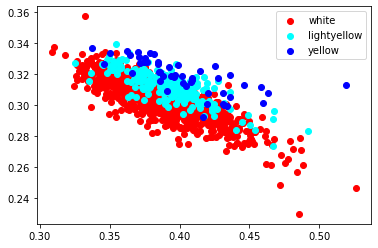

In [118]:
plt.scatter(list_x[0],list_y[0],marker="o",color='red',label="white")
plt.scatter(list_x[1],list_y[1],marker="o",color='cyan',label="lightyellow")
plt.scatter(list_x[2],list_y[2],marker="o",color='blue',label="yellow")
# plt.scatter(list_x[3],list_y[3],marker="o",color='goldenrod',label="brown")
# plt.scatter(list_x[4],list_y[4],marker="o",color='black',label="darkgray")
# fig = plt.figure()
# axes = fig.add_axes([0,0,1,1])
# axes.set_xlabel('R/(R+G+B)')
# axes.set_ylabel('G/(R+G+B)')
plt.legend()
plt.show()

In [106]:
for idx, i in enumerate(list_x[0]):
    if i+list_y[0][idx]>0.75:
        print(list_name[0][idx])

20220511112504-1seg.png
20220511154021-1seg.png
20220512122723-1seg.png
20220514111751-1seg.png
20220516111616-1seg.png
20220518151744-1seg.png
20220518152158-1seg.png
20220518152317-1seg.png
20220520092614-1seg.png
20220520092849-1seg.png
20220520123505-1seg.png
20220520124452-1seg.png
20220521135534-1seg.png
20220521135904-1seg.png
20220531205524-1seg.png
20220531205601-1seg.png
20220531205958-1seg.png
20220603083617-1seg.png
20220603084354-1seg.png
20220605102641-1seg.png
20220605104709-1seg.png
20220605113340-1seg.png
20220605114959-1seg.png
20220605120005-1seg.png
20220605160500-1seg.png
20220607123748-1seg.png
20220607145825-1seg.png
20220613130213-1seg.png
20220613193027-1seg.png
20220616192558-1seg.png
20220617133104-1seg.png
20220617133339-1seg.png
20220620112324-1seg.png
20220620113450-1seg.png
20220622093635-1seg.png
20220622093713-1seg.png
20220624233416-1seg.png
20220717201824-1seg.png
20220729115043-1seg.png
20220730200536-1seg.png


In [1]:
a = cv.imread(r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data3\category\0\20.png')

NameError: name 'cv' is not defined

In [4]:
eval('2+36+5')

43